<a href="https://colab.research.google.com/github/hjhan1201/AIFFEL_Online_Quest/blob/main/Main_Quest03_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#초기 세팅 및 데이터 로드
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(len(x_train))  # x_train 배열의 크기를 출력

2.15.0
11490434/11490434 [==============================] - 0s 0us/step
60000


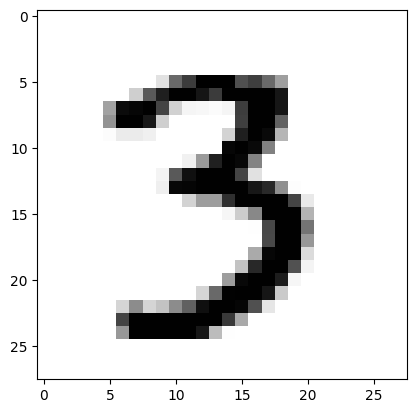

10001 번째 이미지의 숫자는 바로  3 입니다.


In [2]:
# 데이터 확인
index=10000
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [3]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


In [5]:
#모델 구성
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

In [7]:
#학습
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [8]:
#테스트
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1903 - accuracy: 0.9425
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0623 - accuracy: 0.9809
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0446 - accuracy: 0.9859
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0350 - accuracy: 0.9893
Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0274 - accuracy: 0.9917
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0233 - accuracy: 0.9927
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0186 - accuracy: 0.9940
Epoch 8/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0156 - accuracy: 0.9951
Epoch 9/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0129 - accuracy: 0.9960
Epoch 10/10
1875/1875 [==============================] - 30s 16m

In [9]:
#테스트
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

313/313 - 2s - loss: 0.0400 - accuracy: 0.9879 - 2s/epoch - 6ms/step
test_loss: 0.03999154642224312
test_accuracy: 0.9879000186920166


In [10]:
#테스트 회고
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값.
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자.
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

313/313 [==============================] - 2s 6ms/step
model.predict() 결과 :  [6.3325047e-11 6.2485545e-11 8.0022247e-08 3.3098074e-06 8.2829126e-12
 3.1897791e-09 2.2369783e-16 9.9999648e-01 4.2815768e-11 3.1202356e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


model.predict() 결과 :  [6.3325047e-11 6.2485545e-11 8.0022247e-08 3.3098074e-06 8.2829126e-12 3.1897791e-09 2.2369783e-16 9.9999648e-01 4.2815768e-11 3.1202356e-09]

이 벡터는 model이 추론한 결과가 각각 0, 1, 2, ..., 7, 8, 9일 확률을 의미

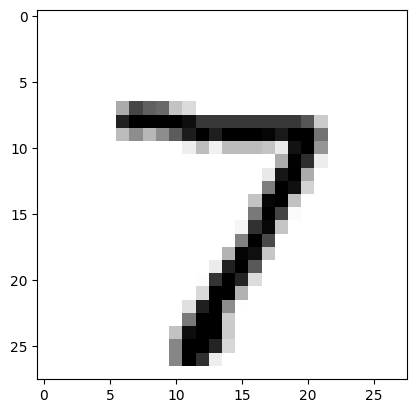

In [11]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [4.13790545e-15 3.37425687e-09 9.93002534e-01 4.23513120e-06
 2.86468738e-10 1.00015924e-11 5.18667010e-12 6.12027096e-11
 6.99310470e-03 3.03449793e-10]
라벨: 8, 예측결과: 2


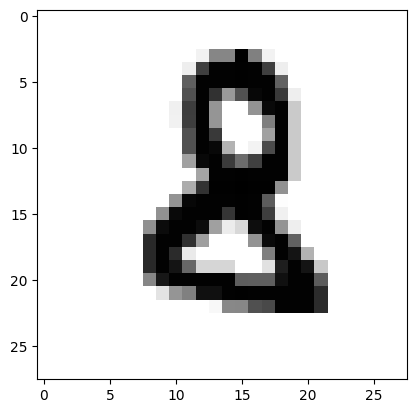

예측확률분포: [9.21728116e-09 5.56842517e-10 1.50106996e-10 6.99589648e-08
 4.95501251e-10 8.89403164e-01 1.03635415e-01 1.50617919e-12
 6.96125999e-03 4.47697733e-13]
라벨: 6, 예측결과: 5


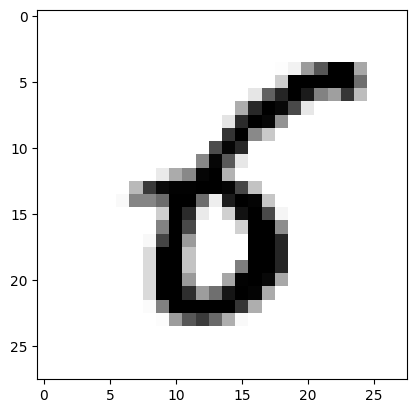

예측확률분포: [7.7052753e-11 1.0278340e-10 2.3224788e-07 7.3114976e-02 1.8452694e-12
 9.0244013e-01 5.1928725e-13 2.6185543e-11 2.5546976e-07 2.4444388e-02]
라벨: 9, 예측결과: 5


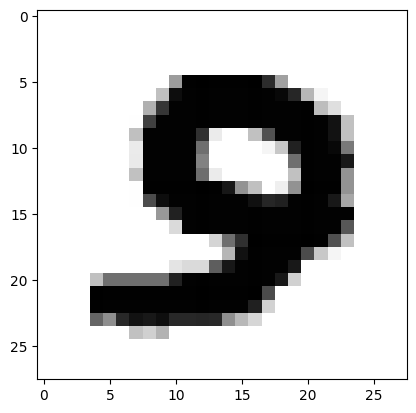

예측확률분포: [4.0348264e-04 3.5932395e-03 7.8783232e-01 1.0301215e-01 3.2115672e-03
 2.7581581e-03 9.9004917e-02 1.9244112e-06 1.7589102e-04 6.3734401e-06]
라벨: 6, 예측결과: 2


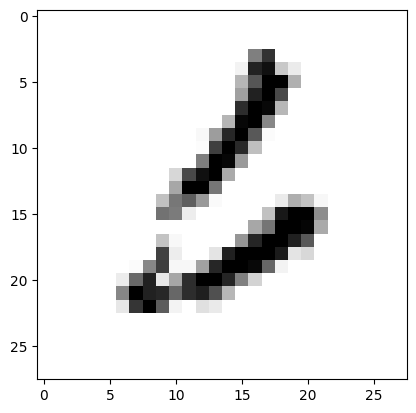

예측확률분포: [1.9449342e-04 8.1042910e-04 9.9539715e-01 6.9238904e-06 2.3134392e-07
 5.5868878e-09 2.0700222e-06 6.4223557e-04 2.9464529e-03 1.4996375e-09]
라벨: 0, 예측결과: 2


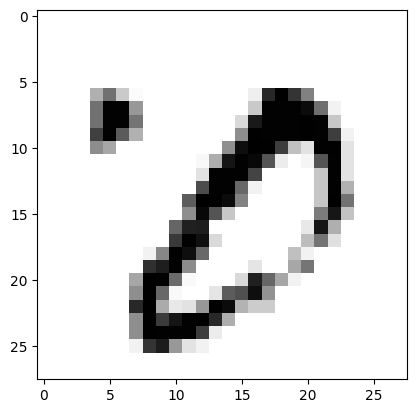

In [13]:
# model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우는 어떤 경우인지 직접 확인
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다.
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [14]:
# 하이퍼파라미터 조정
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 32)               

In [15]:
# 하이퍼파라미터 조정 - 특성 수 조정
n_channel_1=32
n_channel_2=64
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 32)               

In [17]:
# 하이퍼파라미터 조정 - 드롭아웃 추가, 커널 크기 조정

from keras.layers import Dropout

n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (5,5), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (5,5), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 12, 12, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 32)          12832     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 4, 4, 32)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 32)               

In [18]:
# 하이퍼파라미터 조정 - 드롭아웃 추가, 커널 크기 조정, 배치정규화 추가

from keras.layers import Dropout

n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (5,5), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(n_channel_2, (5,5), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 12, 12, 16)        0         
 ng2D)                                                           
                                                                 
 batch_normalization (Batch  (None, 12, 12, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 32)          12832     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 4, 4, 32)          0         
 ng2D)                                                           
                                                      